# Classification

In this code cell, we present the machine learning pipeline using the `scikit-learn` library to classify fruits as either apples or oranges based on their features. We start by collecting data, where each fruit is described by two features: weight and texture, with texture coded as 0 for smooth and 10 for bumpy. This setup uses a simple labeled dataset, where `0` represents an apple and `1` signifies an orange.

Following the data collection, we proceed to train a Decision Tree classifier model. Decision Trees are popular for their simplicity and interpretability, making them an excellent choice for introductory machine learning tasks. The training process involves fitting our model to the known features and their corresponding labels, enabling the model to learn how to distinguish between apples and oranges based on these features.

Finally, we test the trained model's predictive power by asking it to classify a new sample—an unseen fruit with a specific weight and texture. The model's prediction is then translated back into a more understandable form, indicating whether the fruit in question is likely an apple or an orange. This code cell encapsulates the fundamental steps of a machine learning project: data collection, model training, and making predictions.


# Simple Decision Tree Calculation by Hand

Creating a decision tree by hand involves calculating a measure of impurity or "information gain" at each step to decide how to split the data. We'll use Gini Impurity as our measure for this example.

Given data with features $[weight, texture]$ and labels 0 for "Apple" and 1 for "Orange", our data points are:
1. 150g, Smooth: Apple
2. 170g, Smooth: Apple
3. 140g, Bumpy: Orange
4. 130g, Bumpy: Orange

## Step 1: Calculate Gini Impurity for the Starting Node
The Gini impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset. The Gini Impurity of a dataset is $1 - \sum (p_i)^2$, where $p_i$ is the fraction of items labeled with class i in the set.

For the starting node, with 2 apples and 2 oranges, the Gini Impurity is:
$$Gini = 1 - \left( \left(\frac{2}{4}\right)^2 + \left(\frac{2}{4}\right)^2 \right) = 1 - (0.25 + 0.25) = 0.5$$

$Gini = 0$ indicates a perfectly pure node (all elements belong to the same class).
$Gini = 0.5$ indicates maximum impurity (elements are evenly distributed among all classes).

## Step 2: Calculate Gini Impurity for Each Split
Let's consider a simple split based on texture, which clearly divides our data into two categories: Smooth and Bumpy.

- **Smooth (2 Apples):**
   $$Gini = 1 - \left( \left(\frac{2}{2}\right)^2 + \left(\frac{0}{2}\right)^2 \right) = 0$$

- **Bumpy (2 Oranges):**
   $$Gini = 1 - \left( \left(\frac{0}{2}\right)^2 + \left(\frac{2}{2}\right)^2 \right) = 0$$

## Step 3: Calculate the Information Gain for the Split
Information Gain is the change in Gini Impurity before and after the split. The Gini Impurity of the starting node is 0.5, and the Gini Impurity for both "Smooth" and "Bumpy" splits is 0.

For the texture split:
$$Information Gain = Gini_{\text{start}} - \left( \frac{n_{\text{smooth}}}{N} \times Gini_{\text{smooth}} + \frac{n_{\text{bumpy}}}{N} \times Gini_{\text{bumpy}} \right)$$
$$= 0.5 - \left( \frac{2}{4} \times 0 + \frac{2}{4} \times 0 \right) = 0.5$$

Since the Information Gain is 0.5 and there are no other features to split on that would provide greater gain, we split on texture.

## Conclusion:
The decision tree's root node splits the data based on texture, with "Smooth" leading to "Apple" and "Bumpy" leading to "Orange", each as a leaf node. No further splits are necessary as each leaf node is pure (contains only one class).


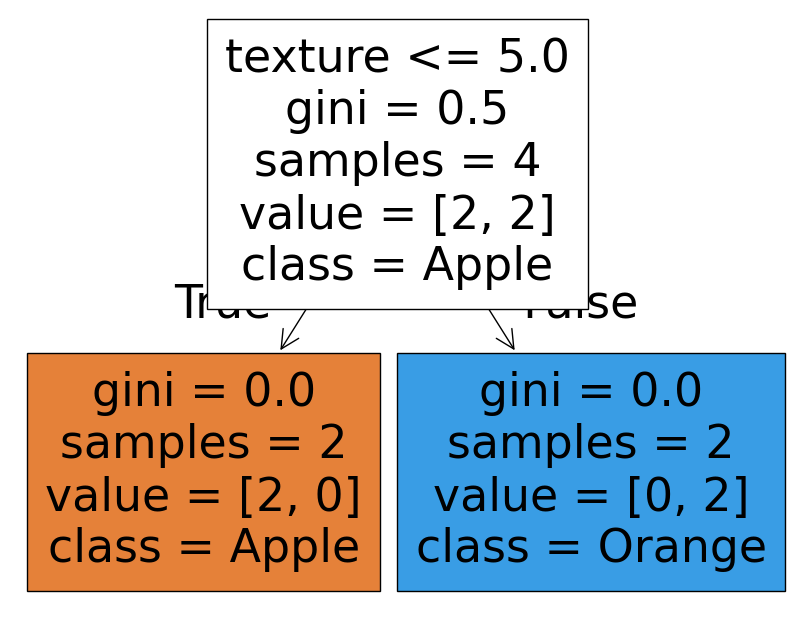

In [1]:
from sklearn import tree
import matplotlib.pyplot as plt

# Step 1: Collecting Data
# Features: [weight, texture] where texture is 0 for smooth and 10 for bumpy
# Labels: 0 for "Apple" and 1 for "Orange"
features = [[150, 0], [170, 0], [140, 10], [130, 10]]  # Example features
labels = [0, 0, 1, 1]  # 0: Apple, 1: Orange

# Step 2: Training the Model
# We will use a Decision Tree classifier for this simple example
clf = tree.DecisionTreeClassifier()
clf = clf.fit(features, labels)

plt.figure(figsize=(10,8))
tree.plot_tree(clf, feature_names=["weight", "texture"], class_names=["Apple", "Orange"], filled=True)
plt.savefig("./decision_tree.png")
plt.show()

In [ ]:
# Step 3: Testing the Model
# Let's predict the fruit type for a fruit with weight 160g and texture rating 0 (smooth)
prediction = clf.predict([[160, 0]])

# Translate the prediction back to the fruit name
fruit = "Apple" if prediction[0] == 0 else "Orange"
print(f"The model predicts: {fruit}")

The model predicts: Apple


# Regression

In this updated code cell, we shift our focus from classification to regression within the realm of machine learning, using the same scikit-learn library. Here, our objective is to predict the sweetness level of fruits based on their features, which remain as weight and texture. However, unlike the previous example where texture was a binary attribute, here we might consider it on a continuous scale, still simplified to 0 for smooth and 10 for bumpy textures for this demonstration.

The dataset has been adapted to suit a regression problem. Each fruit is still characterized by its weight and texture, but now, instead of being labeled as an apple or an orange, it's associated with a sweetness level on a scale of 0 to 10. This approach requires a regression model capable of predicting a continuous output rather than classifying inputs into discrete categories.

We employ a Decision Tree regressor, an adaptation of the Decision Tree algorithm for regression tasks. This model learns from the training data, consisting of features and their corresponding sweetness levels, to understand how various factors contribute to the overall sweetness of a fruit.

Once the model is trained, we evaluate its performance by predicting the sweetness level of a new fruit sample, given its weight and texture. The output is a numeric value representing the predicted sweetness level, demonstrating the model's ability to infer continuous outcomes based on learned patterns from the training data. This code cell illustrates the transition from a classification to a regression problem, showcasing the versatility of machine learning models in handling different types of predictive tasks.

A common metric used for finding the best split is the Mean Squared Error (MSE). To calculate the MSE in a regression tree, you follow these steps:

1. **Prediction**: For each data point in your dataset, use the regression tree to predict the value. In a regression tree, each leaf node represents a predicted value for instances that end up in that leaf.

2. **Actual Values**: You should have the actual values for the target variable for each data point in your dataset.

3. **Calculate Squared Errors**: For each data point, calculate the squared error, which is the square of the difference between the predicted value (from the regression tree) and the actual value.

    $$ \text{Squared Error} = (y_i - \hat{y}_i)^2 $$

  where $y_i$ is the actual value for the $i^{th}$ data point, and $\hat{y}_i$ is the predicted value for the $i^{th}$ data point.


4. **Calculate Mean Squared Error (MSE)**: Finally, average the squared errors over all data points to get the MSE.

    $$ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

  where \(n\) is the total number of data points in the dataset.

The MSE provides a measure of the quality of the regression tree's predictions, with lower values indicating better fit to the data. It's a commonly used metric to evaluate the performance of regression models, including regression trees.


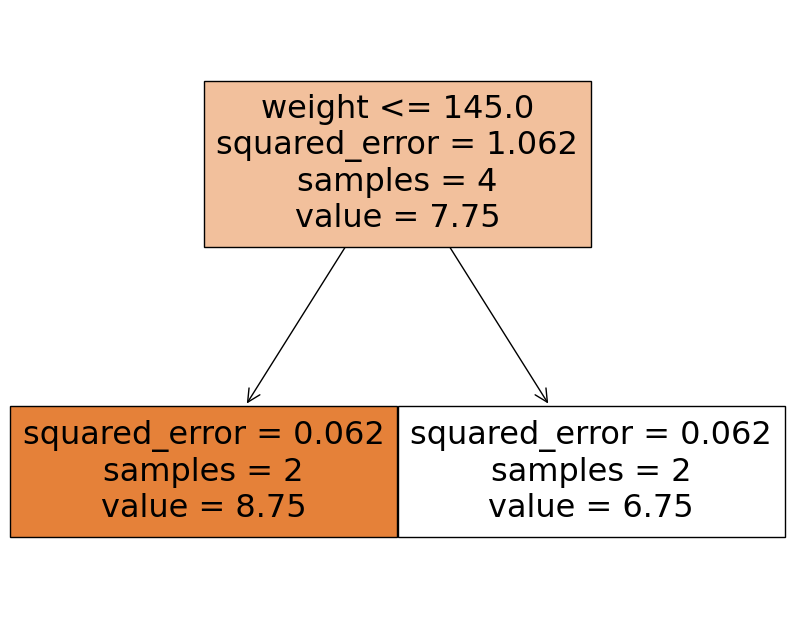

In [ ]:
from sklearn import tree

# Step 1: Collecting Data
# Features: [weight, texture] where texture is 0 for smooth and 10 for bumpy
# Labels (Sweetness level on a scale of 0 to 10)
features = [[150, 0], [170, 0], [140, 10], [130, 10]]  # Example features
labels = [7, 6.5, 8.5, 9]  # Sweetness levels

# Step 2: Training the Model
# We will use a Decision Tree regressor for this regression example
regressor = tree.DecisionTreeRegressor(max_depth=1)  # Check different max depth values
regressor = regressor.fit(features, labels)

plt.figure(figsize=(10,8))
tree.plot_tree(regressor, feature_names=["weight", "texture"], class_names=["Apple", "Orange"], filled=True)
plt.savefig("./regression_tree.png")
plt.show()

In [ ]:
# Step 3: Testing the Model
# Let's predict the sweetness for a fruit with weight 160g and texture rating 0 (smooth)
predicted_sweetness = regressor.predict([[160, 0]])

print(f"The model predicts the sweetness level to be: {predicted_sweetness[0]:.2f}")

The model predicts the sweetness level to be: 6.75


# Unsupervised Learning

In this code cell, we explore the concept of unsupervised learning through K-Means clustering, a popular clustering algorithm used to group data points into clusters based on their similarity. Unlike the previous examples that focused on supervised learning tasks (classification and regression), this example doesn't rely on labeled outcomes for training. Instead, it identifies patterns and structures within the data itself.

We begin by collecting a dataset of features, still using fruit attributes like weight and texture for consistency with the previous examples. However, this time, there's no target variable like fruit type or sweetness level; the algorithm will group fruits based solely on these features.

We then initialize and fit a K-Means model specifying the desired number of clusters, in this case, two. This is an arbitrary choice for simplicity, aiming to demonstrate the clustering process. The K-Means algorithm iteratively assigns each data point to the nearest cluster center, then updates the centers based on the mean of the points in each cluster, continuing this process until the cluster assignments no longer change.

After fitting the model to our data, we examine the resulting clusters by looking at the labels assigned to each data point and the coordinates of each cluster's center. This information helps us understand how the algorithm has decided to group the data.

The final step is visualization, where we plot each fruit data point, color-coded by its cluster assignment, along with green 'X' markers denoting the cluster centers. This visual representation provides an intuitive understanding of how the fruits have been grouped based on their features and the positioning of the cluster centers, offering insights into the natural groupings within the data.

This code cell demonstrates the power and simplicity of unsupervised learning for discovering hidden patterns in data without the need for predefined labels or outcomes, showcasing a different facet of machine learning applications.

Unlike supervised learning, unsupervised learning algorithms are given no labels or answer keys. They must make sense of the data by identifying its inherent structure and patterns.

# K-means
K-means is an unsupervised clustering algorithm that partitions \(n\) observations into \(k\) clusters, with each observation belonging to the cluster with the nearest mean. The algorithm follows these steps:

1. **Initialization**:
   - Choose the number of clusters, \(k\).
   - Randomly select \(k\) initial centroids from the data.

2. **Assignment Step**:
   - For each point, assign it to the closest centroid according to a distance metric (e.g., cosine similarity), forming \(k\) clusters.

3. **Update Step**:
   - Recalculate the centroids of each cluster as the mean of all points in the cluster.

4. **Iteration**:
   - Repeat the Assignment and Update steps until centroids do not change significantly, indicating convergence, or a set number of iterations is reached.

The algorithm's efficiency makes it widely used, but it can converge to a local minimum, and the outcome can be sensitive to the initial centroid selection. The optimal number of clusters, \(k\), is crucial and can be estimated using methods like the elbow method or silhouette analysis.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


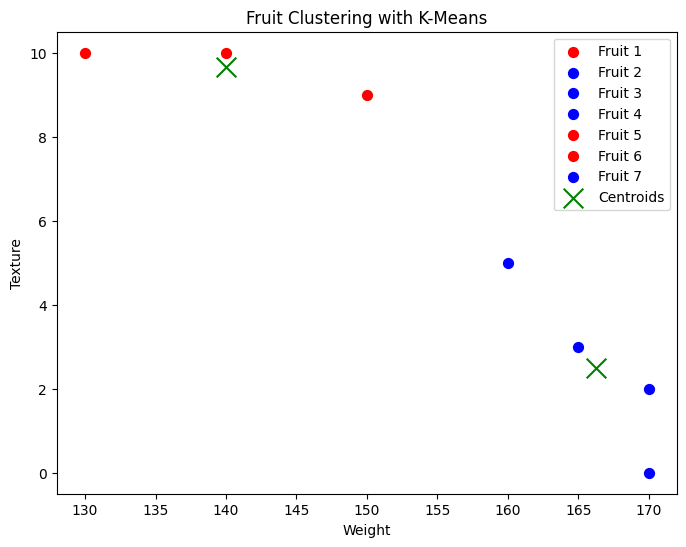

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Collecting Data
features = np.array([[150, 9], [170, 0], [170, 2], [165, 3], [140, 10], [130, 10], [160, 5]])  # Example features

# Step 2: Performing Clustering
kmeans = KMeans(n_clusters=2)  # We choose 2 clusters for simplicity
kmeans.fit(features)

# Step 3: Examining the Clusters
cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

# Step 4: Visualization
plt.figure(figsize=(8, 6))
colors = ['red', 'blue']

# Plotting data points with cluster-dependent colors
for i in range(features.shape[0]):
    plt.scatter(features[i][0], features[i][1], color=colors[cluster_labels[i]], s=50, label=f'Fruit {i+1}')

# Plotting the cluster centers
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], color='green', marker='x', s=200, label='Centroids')

plt.title('Fruit Clustering with K-Means')
plt.xlabel('Weight')
plt.ylabel('Texture')
plt.legend(loc='best')

# Removing duplicate labels from the legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.show()

# NLP example: classifying email messages
In this task, we'll train a decision tree classifier to differentiate between spam and non-spam messages. We'll start by extracting specific features from a set of messages, such as the count of uppercase words and the presence of exclamation marks, which are common indicators of spam. After training the classifier on a labeled dataset, we'll test its performance on a new set of messages. These new samples will be classified as either "spam" or "not spam" based on the learned patterns, demonstrating the classifier's ability to generalize from the training data to unseen examples.

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Step 1: Define the messages and their labels
messages = [
    "Congratulations! You've won a FREE vacation to Bahamas! Click NOW to claim your prize!",
    "Hi JOHN !!!, please review the attached report and provide your feedback by EOD. Thanks.",
    "URGENT! Your account has been compromised. Send your bank details to secure it.",
    "Meeting reminder: Project sync-up at 2 PM in the main conference room. Please be on time.",
    "WIN BIG! This is your LAST CHANCE to claim your lottery winnings!",
    "EXCLUSIVE OFFER just for you! Buy one, get one FREE on all our products. HURRY, offer ends soon!",
    "You're SELECTED! Click here to receive a FREE gift card worth $500. Don't miss out!",
    "Could you please send over the files for last month's sales report?",
    "Reminder: Your doctor's appointment is scheduled for Monday at 10 AM.",
]
labels = [1, 0, 1, 0, 1, 1, 1, 0, 0]  # 1 for spam, 0 for not spam


# Step 2: Define a function to extract features: uppercase_count, exclamation_count, length
def extract_features(messages):
    features = []
    for message in messages:
        uppercase_count = sum(word.isupper() for word in message.split())
        exclamation_count = message.count('!')
        length = len(message)
        features.append([uppercase_count, exclamation_count, length])
    return np.array(features)

# Step 3: Extract features from the messages
X = extract_features(messages)
print('uppercase_count, exclamation_count, length')
print(X)

uppercase_count, exclamation_count, length
[[ 2  3 86]
 [ 2  3 88]
 [ 1  1 79]
 [ 1  0 89]
 [ 4  2 65]
 [ 4  2 96]
 [ 2  2 83]
 [ 0  0 67]
 [ 1  0 69]]


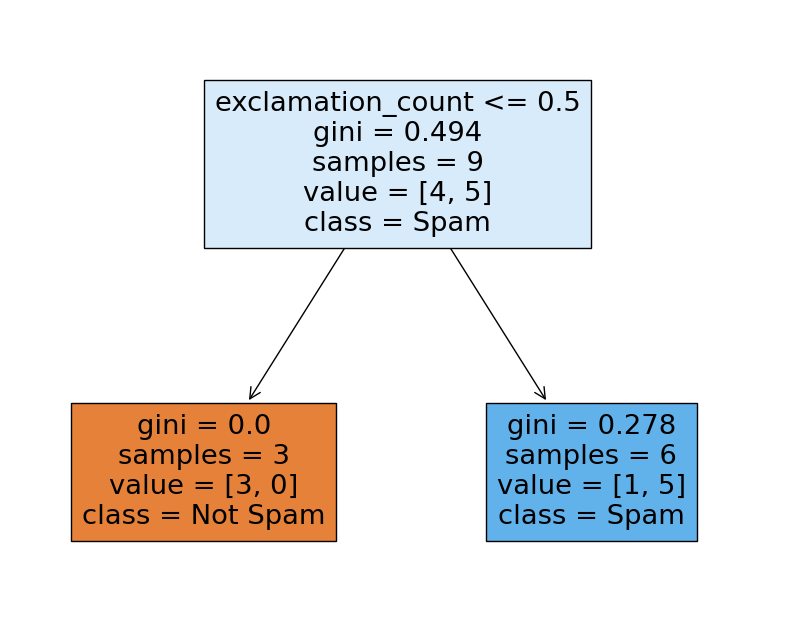

In [ ]:
# Step 4: Train the Decision Tree Classifier
# Try to change the hyperparameters of a decision tree: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=1)
clf.fit(X, labels)

plt.figure(figsize=(10,8))
tree.plot_tree(clf, feature_names=["uppercase_count", "exclamation_count", "length"], class_names=["Not Spam", "Spam"], filled=True)
plt.savefig("./regression_tree.png")
plt.show()

In [ ]:
# Step 5: Predicting a new message
new_samples = [
    "Last chance to earn triple points on your next purchase! Don't miss out!",
    "Team meeting rescheduled to Wednesday at 3 PM. Please update your calendars.",
    "Claim your FREE trial now! Exclusive offer for selected customers only.",
    "Reminder: Your library books are due this Friday. Avoid late fees!",
    "CONGRATULATIONS, you've WON a DREAM CRUISE to the Caribbean!"
]

# Extract features from the new samples
new_features = extract_features(new_samples)

# Predict each new sample
for test_sample in new_features:
    # Reshape 'test_sample' to make it 2D
    test_sample_reshaped = test_sample.reshape(1, -1)
    new_prediction = clf.predict(test_sample_reshaped)
    print("Spam" if new_prediction[0] == 1 else "Not Spam")

Spam
Not Spam
Spam
Spam
Spam
